In this notebook I implement the gradient descent algorithm for multiple regression. The dataset used is avalable in [kaggle](https://www.kaggle.com/datasets/schmoyote/coffee-reviews-dataset) and represents coffe review information.

In [3]:
import numpy as np
from numpy import sum
import matplotlib.pyplot as plt
import sqlite3
import pandas
from math import ceil
import copy
import math
from tabulate import tabulate
import seaborn as sb

connection = sqlite3.connect('data/Coffe.db')
cursor = connection.cursor()

In [3]:
cursor.execute("DROP TABLE IF EXISTS Coffe")

df = pandas.read_csv('data/coffee_analysis.csv')
df.rename(columns={"100g_USD": "price100g_USD"}, inplace=True)
df_sql = df.to_sql('coffe',con=connection, if_exists='append', index=False)

In [4]:
schema = cursor.execute('SELECT sql FROM sqlite_master').fetchall()
print(tabulate(schema))

-----------------------
CREATE TABLE "coffe" (
"name" TEXT,
  "roaster" TEXT,
  "roast" TEXT,
  "loc_country" TEXT,
  "origin_1" TEXT,
  "origin_2" TEXT,
  "price100g_USD" REAL,
  "rating" INTEGER,
  "review_date" TEXT,
  "desc_1" TEXT,
  "desc_2" TEXT,
  "desc_3" TEXT
)
-----------------------


In [4]:
data_20 = np.array(cursor.execute("SELECT name, rating, LENGTH(desc_1), LENGTH(desc_2), LENGTH(desc_3), price100g_USD FROM Coffe ORDER BY rating DESC LIMIT 10").fetchall())
print(tabulate(data_20))

data = np.array(cursor.execute("SELECT rating, LENGTH(desc_1), LENGTH(desc_2), LENGTH(desc_3), price100g_USD FROM Coffe  WHERE LENGTH(desc_3) IS NOT NULL ORDER BY rating DESC").fetchall())

X = data[:,0:-1] #rating, LENGTH(desc_1), LENGTH(desc_2), LENGTH(desc_3)
y = data[:,-1]

-----------------------------------------  --  ---  ---  ---  -----
GW01 Finca Sophia Olympus Geisha           98  258  760  225  28.27
Finca Sophia Gesha Washed                  98  322  826  169  44.09
100% Kona SL-28                            97  275  860   72  33.05
Panama Ninety Plus Perci Lot 50            97  509  940  202  26.46
Kenya Karindundu AA Small Lot Reserve      97  329  673  176   5.29
Rukera Espresso                            97  349  491  208   6.23
Rukera Kenya                               97  410  603  231   6.23
Ethiopia Natural Guji D Minor Special Lot  97  311  463  210   5.66
Ardent Ethiopia Natural                    97  325  748  166  15.43
Testi Ayla Double Ethiopia                 97  320  495  150  16.15
-----------------------------------------  --  ---  ---  ---  -----


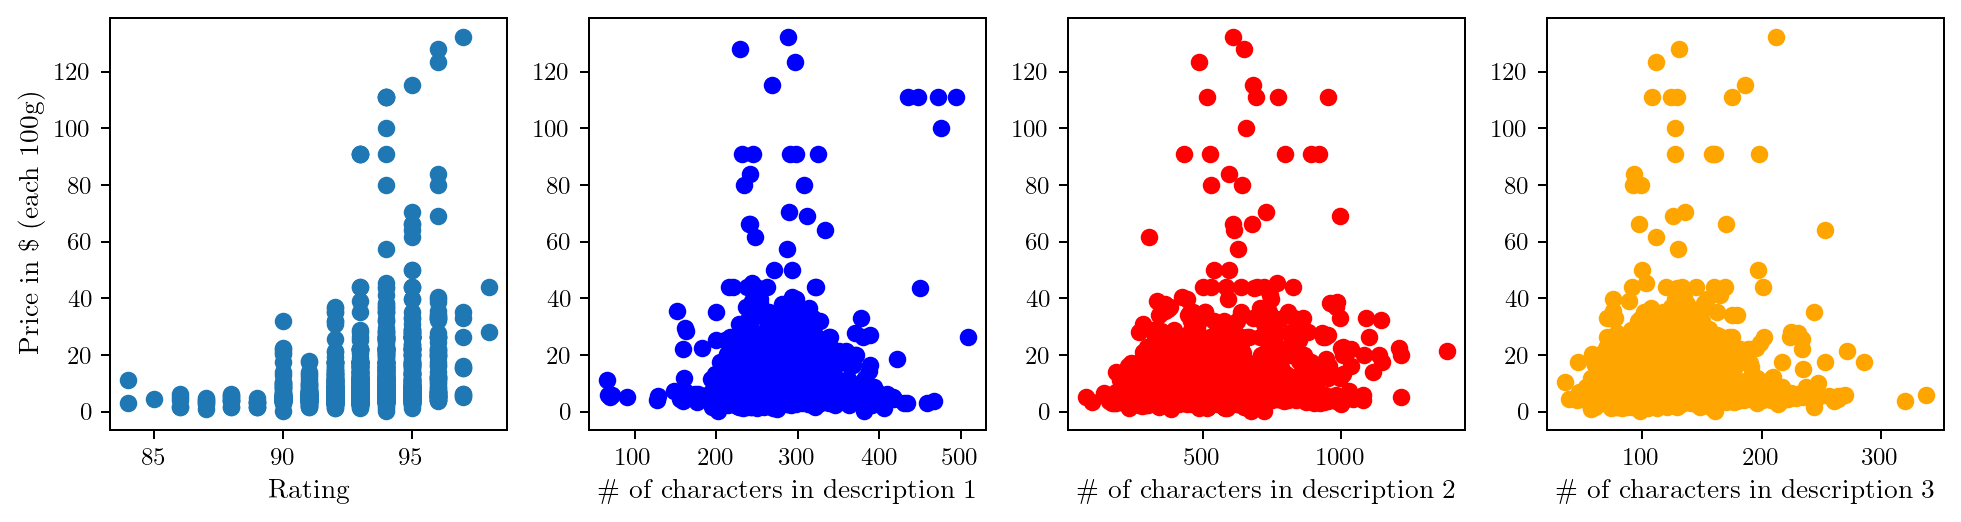

In [27]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(11,3), dpi=180)
ax1.scatter(X[:,0], y)
ax2.scatter(X[:,1],y,c='b')
ax3.scatter(X[:,2],y,c='r')
ax4.scatter(X[:,3],y,c='orange')

pt = 11
ax1.set_xlabel(r'Rating',fontsize=pt)
ax2.set_xlabel(r'\# of characters in description 1',fontsize=pt)
ax3.set_xlabel(r'\# of characters in description 2',fontsize=pt)
ax4.set_xlabel(r'\# of characters in description 3',fontsize=pt)
ax1.set_ylabel(r'Price in \$ (each 100g)',fontsize=pt)
plt.tight_layout()
plt.show()

In [7]:
def cost_function(X, y, w_vec, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        cost = cost + (np.dot(X[i], w_vec) + b - y[i])**2
    J = 1/(2*m)*cost #total cost
    return J

In [8]:
def gradient(X, y, w_vec, b):
    m,n = X.shape
    err = 0
    dJ_dw = np.zeros(n)
    dJ_db = 0

    for i in range(m):
        err = err + np.dot(X[i], w_vec) + b - y[i]
        for j in range(n):
            dJ_dw[j] = dJ_dw[j] + err*X[i,j]
        dJ_db = dJ_db + err
    dJ_dw = 1/m*dJ_dw
    dJ_db = 1/m*dJ_db
    return dJ_dw, dJ_db

In [16]:
def gradient_descent(X, y, alpha, w_vec, b, n_iter):
    J_history, w_history, b_history = [],[],[]
    i = 0
    while i < n_iter:    
        dJ_dw, dJ_db = gradient(X, y, w_vec, b)
        w_vec = w_vec - alpha * dJ_dw
        b = b - alpha * dJ_db
        i = i+1
        J = cost_function(X, y, w_vec, b)
        J_history.append(J)
        w_history.append(w_vec)
        b_history.append(b)
        if i% ceil(n_iter / 10) == 0:
            print(f'Iteration:%i  mean w_vec={w_vec}  b=%.2f  J=%.2f'%(i,b,J))
    return w_vec, b, J_history, w_history, b_history

In [24]:
def scale_z_score(x_train):
    mean = np.mean(x_train)
    std = np.std(x_train)
    x_scaled = (x_train - mean)/std
    return x_scaled

X_s = scale_z_score(X)
y_s = scale_z_score(y)

In [53]:
m,n = X.shape
w_init = np.zeros(n)
b_init = 6.5
w_res, b_res, J_history, w_history, b_history = gradient_descent(X_s, y, alpha=4e-8, w_vec=w_init, b=b_init, n_iter=7000)

Iteration:700  mean w_vec=[-0.10206443  0.01430507  0.16063776 -0.08770989]  b=6.62  J=67.81
Iteration:1400  mean w_vec=[-0.19257968  0.02726034  0.30383821 -0.16533949]  b=6.74  J=66.67
Iteration:2100  mean w_vec=[-0.27282784  0.03901556  0.43153679 -0.23400787]  b=6.83  J=65.82
Iteration:2800  mean w_vec=[-0.34394869  0.04970384  0.54545409 -0.2947099 ]  b=6.92  J=65.21
Iteration:3500  mean w_vec=[-0.40695546  0.05944352  0.6471197  -0.34833002]  b=7.00  J=64.77
Iteration:4200  mean w_vec=[-0.46274894  0.06833981  0.73789346 -0.39565446]  b=7.07  J=64.46
Iteration:4900  mean w_vec=[-0.51212992  0.07648622  0.81898422 -0.43738221]  b=7.13  J=64.26
Iteration:5600  mean w_vec=[-0.5558103   0.08396591  0.89146666 -0.47413466]  b=7.18  J=64.13
Iteration:6300  mean w_vec=[-0.59442294  0.09085278  0.95629619 -0.50646422]  b=7.23  J=64.06
Iteration:7000  mean w_vec=[-0.62853048  0.09721255  1.01432212 -0.53486199]  b=7.27  J=64.03


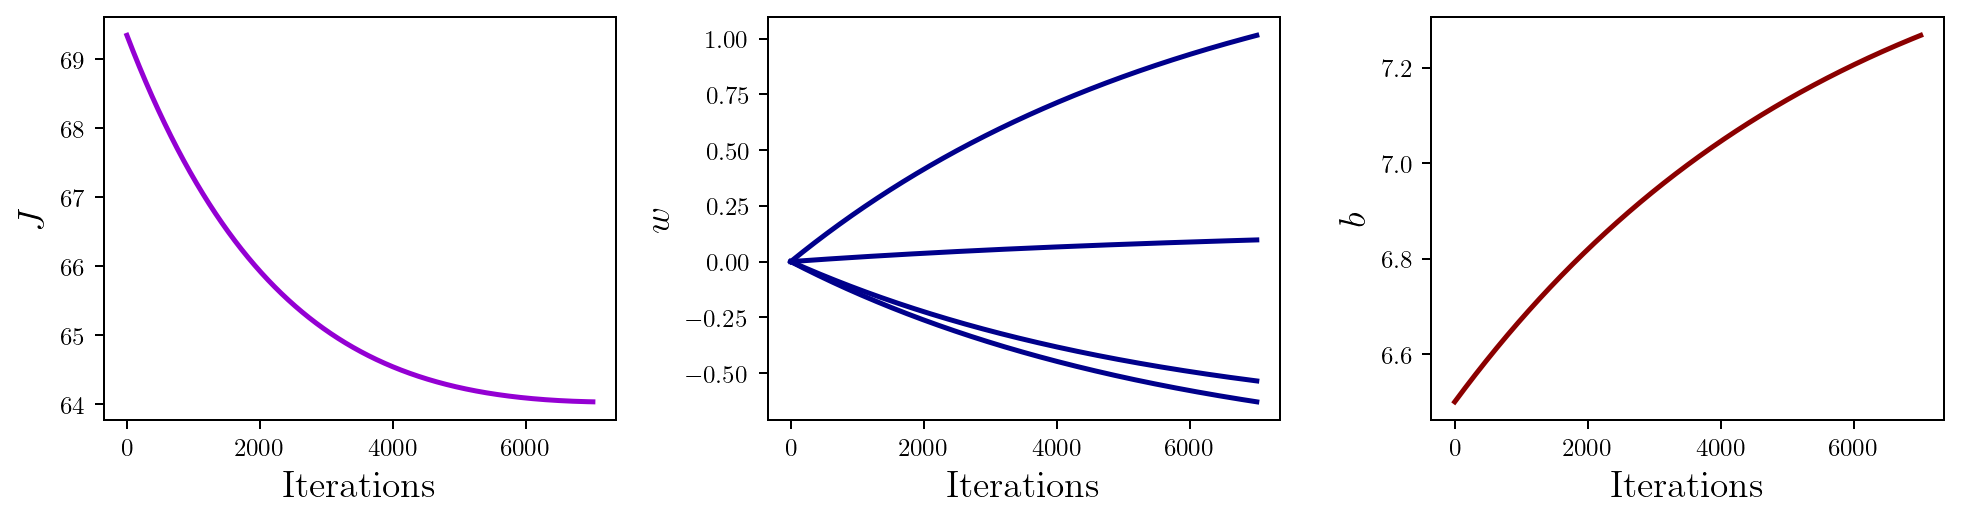

In [54]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(11,3), dpi=180)
ax1.plot(np.arange(len(J_history)), J_history, lw=2, c='darkviolet')
ax2.plot(np.arange(len(w_history)), w_history, lw=2, c='darkblue')
ax3.plot(np.arange(len(b_history)), b_history, lw=2, c='darkred')
pt = 15

ax1.set_xlabel(r'Iterations',fontsize=pt)
ax2.set_xlabel(r'Iterations',fontsize=pt)
ax3.set_xlabel(r'Iterations',fontsize=pt)
ax1.set_ylabel(r'$J$',fontsize=pt)
ax2.set_ylabel(r'$w$',fontsize=pt)
ax3.set_ylabel(r'$b$',fontsize=pt)
plt.tight_layout()
plt.show()

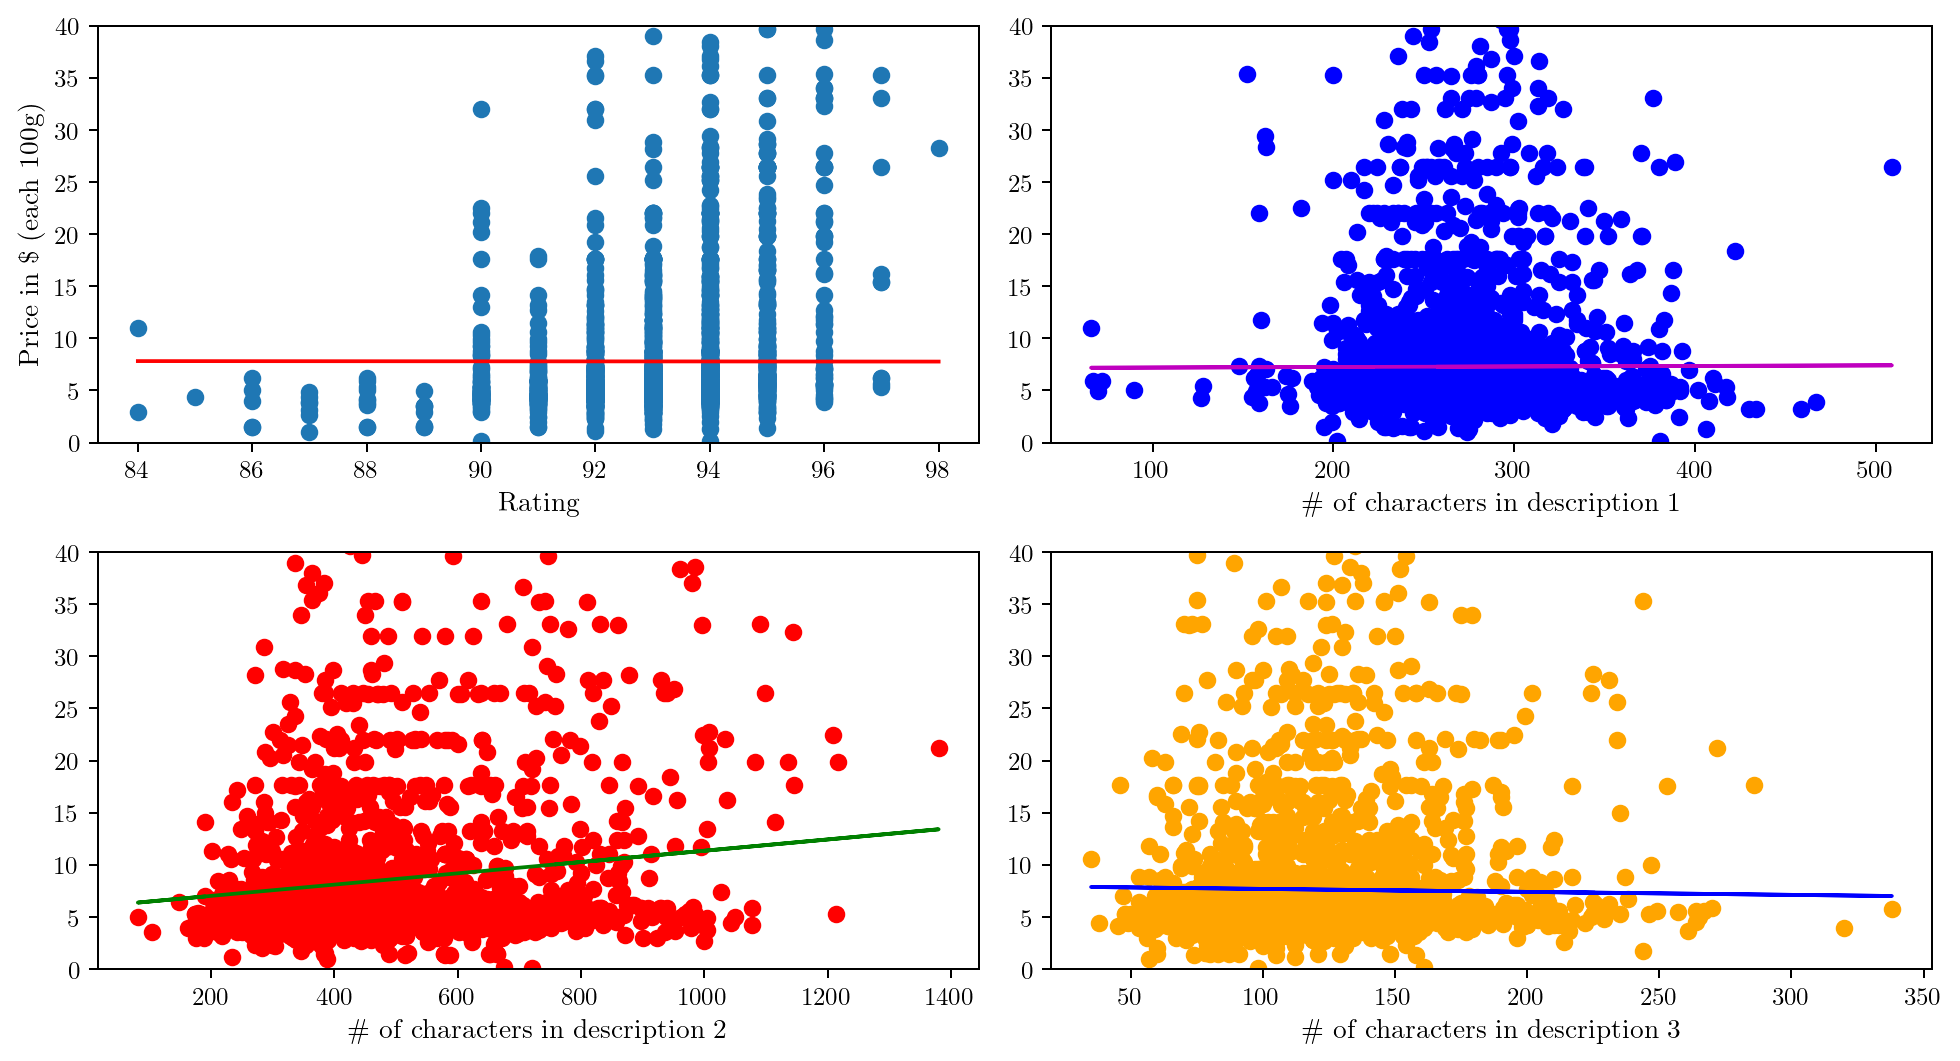

In [55]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(11,6), dpi=180)
ax1.scatter(X[:,0], y)
ax1.plot(X[:,0], w_res[0]*X_s[:,0] + b_res,'r')
ax2.scatter(X[:,1],y,c='b')
ax2.plot(X[:,1], w_res[1]*X_s[:,1] + b_res,'m')
ax3.scatter(X[:,2],y,c='r')
ax3.plot(X[:,2], w_res[2]*X_s[:,2] + b_res,'g')
ax4.scatter(X[:,3],y,c='orange')
ax4.plot(X[:,3], w_res[3]*X_s[:,3] + b_res,'b')

pt = 11
ax1.set_xlabel(r'Rating',fontsize=pt)
ax2.set_xlabel(r'\# of characters in description 1',fontsize=pt)
ax3.set_xlabel(r'\# of characters in description 2',fontsize=pt)
ax4.set_xlabel(r'\# of characters in description 3',fontsize=pt)
ax1.set_ylabel(r'Price in \$ (each 100g)',fontsize=pt)
ax1.set_ylim(0,40)
ax2.set_ylim(0,40)
ax3.set_ylim(0,40)
ax4.set_ylim(0,40)
plt.tight_layout()
plt.show()

Same analysis, but using scikit-learn:

In [5]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y)

b_norm = sgdr.intercept_
w_norm = sgdr.coef_
y_pred = sgdr.predict(X_norm)

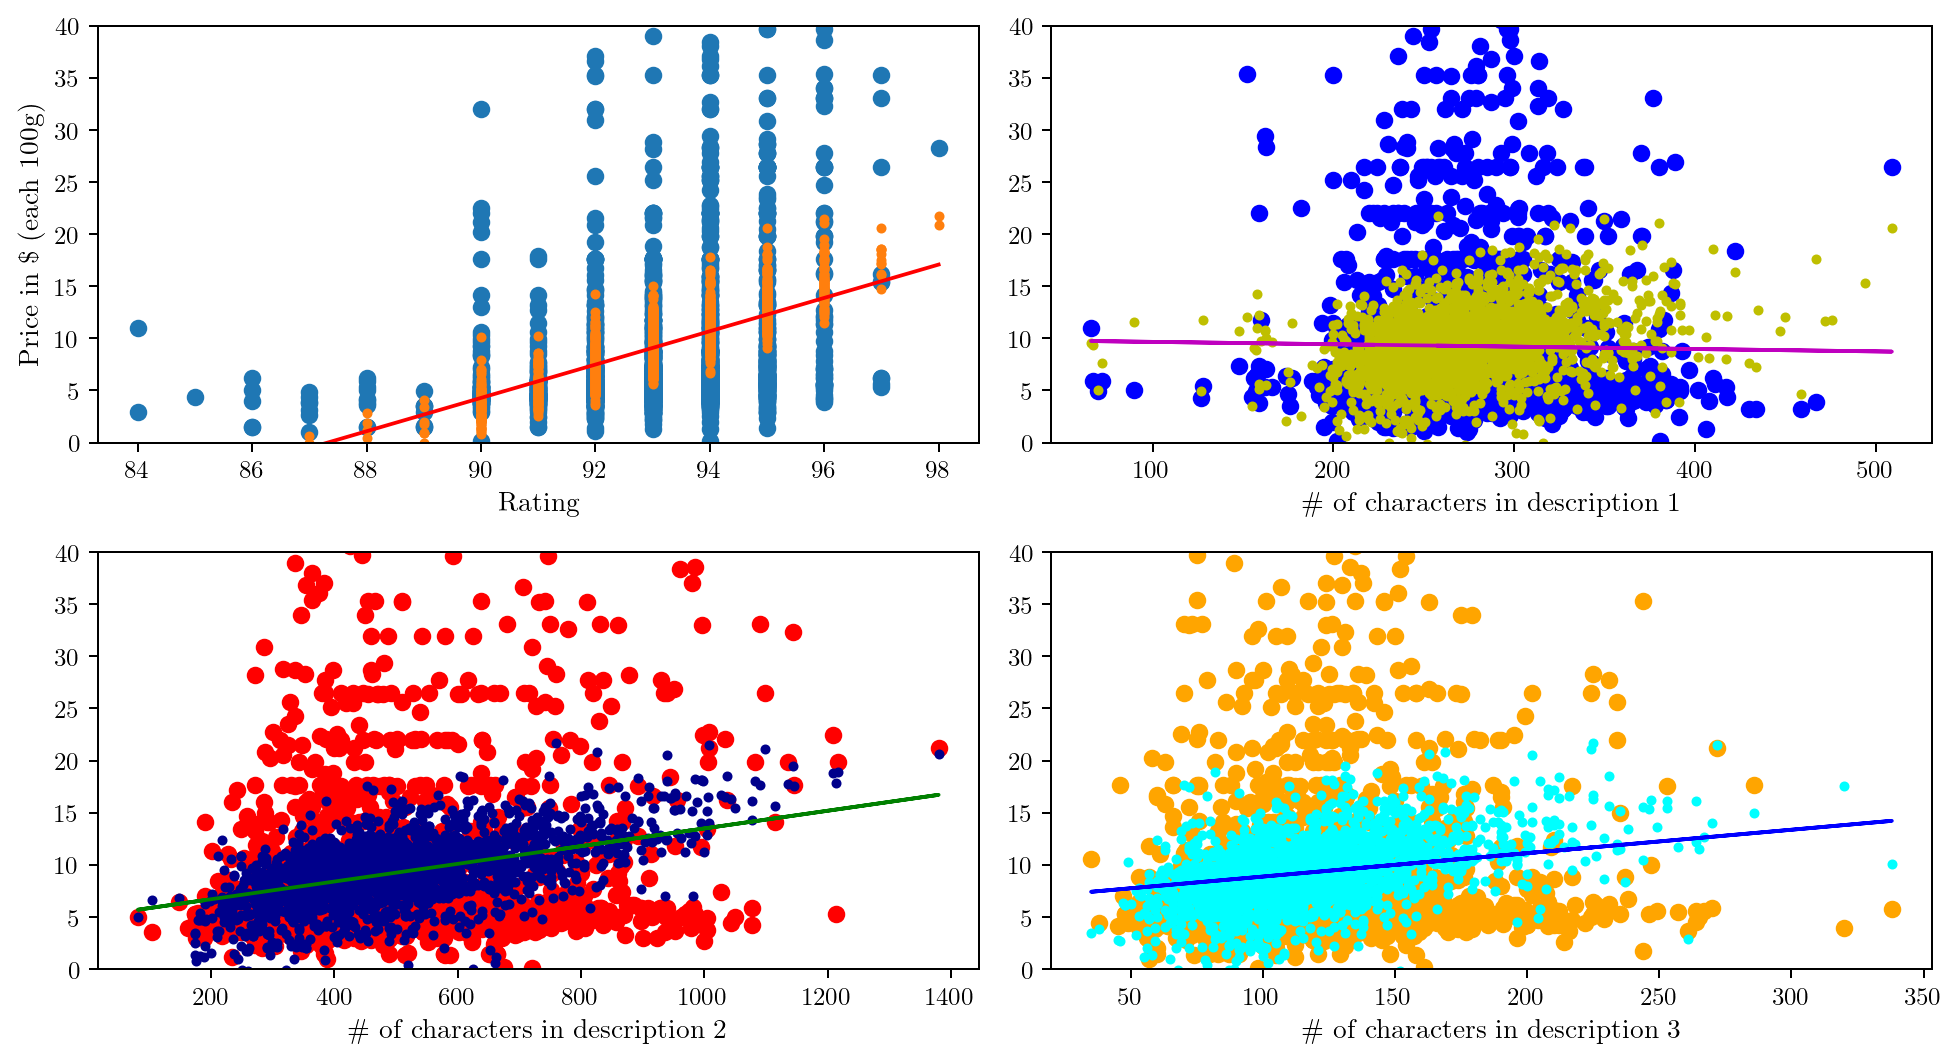

In [36]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(11,6), dpi=180)
ax1.scatter(X[:,0], y)
ax1.scatter(X[:,0], y_pred, marker='.')
ax1.plot(X[:,0], w_norm[0]*X_norm[:,0] + b_norm,'r')
ax2.scatter(X[:,1],y,c='b')
ax2.scatter(X[:,1], y_pred, marker='.', c='y')
ax2.plot(X[:,1], w_norm[1]*X_norm[:,1] + b_norm,'m-')
ax3.scatter(X[:,2],y,c='r')
ax3.scatter(X[:,2], y_pred, marker='.', c='darkblue')
ax3.plot(X[:,2], w_norm[2]*X_norm[:,2] + b_norm,'g')
ax4.scatter(X[:,3],y,c='orange')
ax4.scatter(X[:,3], y_pred, marker='.', c='cyan')
ax4.plot(X[:,3], w_norm[3]*X_norm[:,3] + b_norm,'b')

pt = 11
ax1.set_xlabel(r'Rating',fontsize=pt)
ax2.set_xlabel(r'\# of characters in description 1',fontsize=pt)
ax3.set_xlabel(r'\# of characters in description 2',fontsize=pt)
ax4.set_xlabel(r'\# of characters in description 3',fontsize=pt)
ax1.set_ylabel(r'Price in \$ (each 100g)',fontsize=pt)
ax1.set_ylim(0,40)
ax2.set_ylim(0,40)
ax3.set_ylim(0,40)
ax4.set_ylim(0,40)
plt.tight_layout()
plt.show()